<a href="https://colab.research.google.com/github/molnaredom/gepitan/blob/main/Moln%C3%A1r_%C3%81d%C3%A1m_R4SZ90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. feladat

Az https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data adatbázis [kagylók](https://www.thespruceeats.com/about-abalone-2215715) jellemzőit és életkorát tartalmazza. Hajts végre regressziós gépi tanulási kísérletet arra nézve, hogy az életkor mennyire jól állapítható meg képek a jellemzők alapján! 

*   Az `abalone.data` fájl utolsó oszlopa tartalmazza az életkort.
*   Használd az egyedek véletlenszerű 30%-át kiértékelő adatbázisnak.
*   A k-legközelebbi-szomszéd módszert használd!
*   Az `abalone.names` fájl információkat tartalmaz az adatbázisró, például a jellemzők neveit is.

In [53]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', 
                 sep=',',header=None
                 )
# header magadása
df.columns = ["Sex", "Length","Diameter","Height", "Whole weight", "Shucked weight" , "Viscera weight",  "Shell weight" , "Rings"]


# nevek = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names', 
#                  sep=','
#                  )
	# Name		Data Type	Meas.	Description
	# ----		---------	-----	-----------
	# Sex		nominal			M, F, and I (infant)
	# Length		continuous	mm	Longest shell measurement
	# Diameter	continuous	mm	perpendicular to length
	# Height		continuous	mm	with meat in shell
	# Whole weight	continuous	grams	whole abalone
	# Shucked weight	continuous	grams	weight of meat
	# Viscera weight	continuous	grams	gut weight (after bleeding)
	# Shell weight	continuous	grams	after being dried
	# Rings		integer			+1.5 gives the age in years


df = df.dropna()

In [54]:
# adatok szetvalasztasa

classlabels = df.iloc[:,-1]

features = df.iloc[:,:-1] # az utolsó oszlop kivételével minden oszlop 



In [55]:
#a sex - oszlopot szamma kell alakitani mert pl az F betut nem ismeri fel számként
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder()
cat_features = ohe.fit_transform(features.select_dtypes(include=['object'])) # kategórikus jellemzők ritka mátrixként

import scipy.sparse
num_features = scipy.sparse.csr_matrix(features.select_dtypes(exclude=['object'])) # numerikus jellemzők ritka mátrixként
ohe_features = scipy.sparse.hstack((cat_features, num_features)) # ritka mátrixok horizontális konkatenálása 
ohe_features
features = ohe_features
features

<4177x10 sparse matrix of type '<class 'numpy.float64'>'
	with 33414 stored elements in COOrdinate format>

In [56]:
from sklearn.model_selection import train_test_split
train_features, valid_features, train_classlabels, valid_classlabels= train_test_split(features,
                                                                                       classlabels,
                                                                                       test_size=0.30
                                                                                    
                                                                                       )

In [57]:
# k legkozelebbi modszer hasznalata

from sklearn.neighbors import KNeighborsRegressor

dt = KNeighborsRegressor(n_neighbors=9) # döntési fa regresszióra
dt.fit(train_features, train_classlabels) # tanítás a tanító adatbázison
prediction = dt.predict(valid_features) # predikció a teszt adatbázison



# 2/A. feladat
Hangold be a k-legközelebbi-szomszéd meta-paraméterit. (bónus feladat: a meta-paraméter értékekre a túltanási ábra kirajzolása)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
valid_f1=[]
train_f1=[]
for k in range(1,20,2): # páratlan k értékek
  knn = KNeighborsClassifier(n_neighbors=k) # kNN különböző k értékekkel
  knn.fit(train_features, train_classlabels)  
  valid_prediction = knn.predict(valid_features)
  valid_f1.append(f1_score(valid_classlabels, valid_prediction, pos_label='positive', average='micro'))
  train_prediction = knn.predict(train_features)
  train_f1.append(f1_score(train_classlabels, train_prediction, pos_label='positive', average='micro'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

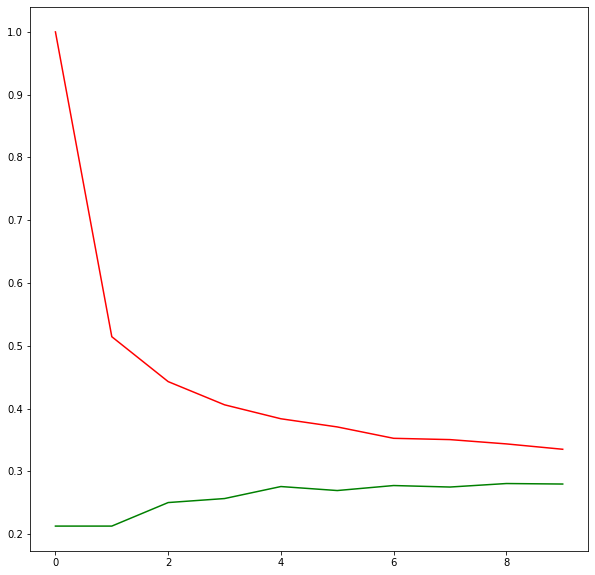

In [59]:
### kiiratas
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(valid_f1, c="green")
plt.plot(train_f1, c="red")

In [60]:
# az 5 ös értéket válaszjuk a legjobbnak mert akkor volt a legjobb az eredmény a validációs halamzon (zöld)

# 2/B. feladat

Tesztelj egy lineáris gépet is ugyanerre a feladatra! 

A végén szövegként írd le, hogy a k-legközelebbi-szomszéd és a lineáris gékét algoritmus/megközelítés közül melyiket tekinted jobbnak!


In [61]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # lineáris gép regresszióra
reg.fit(train_features, train_classlabels)
prediction = reg.predict(valid_features)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1365: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels

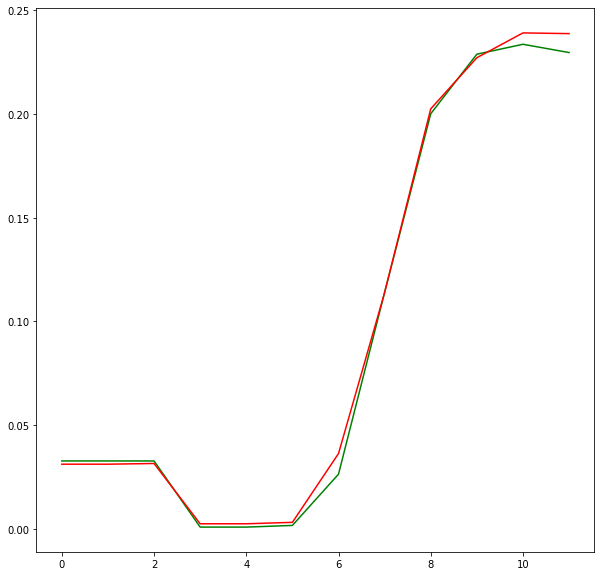

In [62]:
# Linearis gep mata parameter

from sklearn.linear_model import LogisticRegression
valid_f1=[]
train_f1=[]
for l in range(-7,5):
  lin = LogisticRegression(random_state=0, 
                           max_iter=10000, # nehéz feladat a lineáris gépnek, engedjük a defaultnál tovább tanulni
                           class_weight="balanced", # tanulásnál átsúlyozzuk a ritka osztálycímkéket, ez sokat segít lineáris gépeknél
                           C=10**l) # regularizációs együttható 
  lin.fit(train_features, train_classlabels)  
  valid_prediction = lin.predict(valid_features)
  valid_f1.append(f1_score(valid_classlabels, valid_prediction, pos_label='positive', average='micro'))
  train_prediction = lin.predict(train_features)
  train_f1.append(f1_score(train_classlabels, train_prediction, pos_label='positive', average='micro'))

#kirajzolás
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(valid_f1, c="green")
plt.plot(train_f1, c="red")

#Sokáig fut de működik

#a 10^4 értéket érdemes választani mert ott tjelesitett a legjobban a validacios halamaz
# mivel minden lefuttatásnál random értékek futnak le, mindig más eredmányt fugunk kapni (kivettem a seedet szétválasztásnál)

# 3. feladat
Melyik jellemző a leghasznosabb a tanult lineáris gépben?

Építs erre az egy jellemzőre egy szabályalapú baselinet és értékeld ki!

In [65]:
# BASELINE REGRESSZIORA
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

#mean_squared_error(prediction, testLabels)

dummy = DummyRegressor(strategy='mean')
dummy.fit(train_features, train_classlabels)
mean_squared_error(dummy.predict(valid_features), valid_classlabels)

# éppeen nem volt időm megcsinálni, hogy legerosebb jelllemzot kiirjam
#model.coef_

9.982150609883337